# Intro

* In this chapter we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “hello world” of machine learning: whenever people come up with a new classification algorithm they are curious to see how it will perform on MNIST, and anyone who learns machine learning tackles this dataset sooner or later.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
print("X Shape: ", X.shape) 
print("y Shape: ", y.shape)

X Shape:  (70000, 784)
y Shape:  (70000,)


*  There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

* Let’s take a peek at one digit from the dataset.

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.figure(figsize=(3, 2))
    plt.imshow(
        image,
        cmap='binary'
    )
    plt.axis('off')

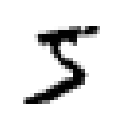

In [7]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

* It's look like 5, let's check it.

In [8]:
y[0]

'5'

* Hot Dammnn ! it's 🔥

* Create Test Set

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[6000], y[:60000], y[60000:]

# Training a Binary Classifier

* Try to identify one digit, the number 5.

In [10]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

* Let's use SGDClassifier.

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state =42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

* Let's do it by DummyClassifier

In [14]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(
    any(
        dummy_clf.predict([X_train])
    )
)



False


It's `False` because of Dummy Classifier and its prediction strategy.

In [15]:
cross_val_score(
    dummy_clf,
    X_train,
    y_train_5,
    cv=3,
    scoring="accuracy"
)

array([0.90965, 0.90965, 0.90965])

* A much better way to evaluate the performance of a classifier is to look at the `confusion matrix (CM)`.

* Implementing Cross-Validation

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is
                                      # not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
   clone_clf = clone(sgd_clf)
   X_train_folds = X_train[train_index]
   y_train_folds = y_train_5[train_index]
   X_test_fold = X_train[test_index]
   y_test_fold = y_train_5[test_index]
   clone_clf.fit(X_train_folds, y_train_folds)
   y_pred = clone_clf.predict(X_test_fold)
   n_correct = sum(y_pred == y_test_fold)
   print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


## Confusion Matrix

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [24]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision & Recall

In [26]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


* When we compare two classifier, F1 is used.

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

## The Precision/Recall Trade-off

* Instead of calling the classifier's predict method, decision_function() method can be used which returns a score for each instance.

In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [30]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [31]:
threshold=3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

* This confirms that raising the threshold decreases recall. The image actually repreent a 5, and the classifier detects it when the threshold s 0, but it misses it when the threshold is increased to 3000.

* How do we decide which threshold to use ?

In [33]:
y_scores = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3,
    method="decision_function"
)

In [34]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

* Let's visuzalize these scores

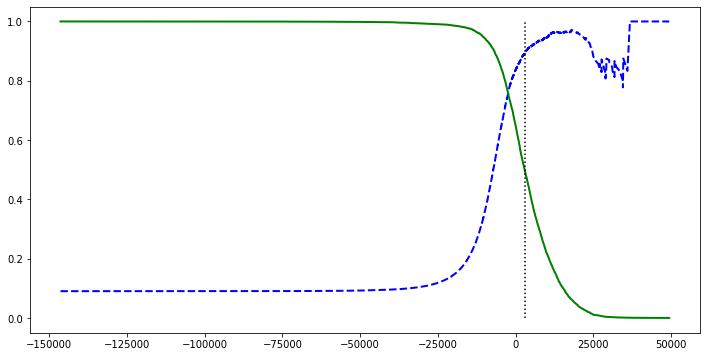

In [42]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(
    y_train_5,
    y_scores
)

plt.figure(figsize=(12, 6))
plt.plot(thresholds, precisions[:-1], 'b--', label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g-', label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()